# NLP SENTIMENT ANALYSIS




# EDA (Exploratory Data Analysis)

In [1]:
#Import Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import numpy as np

In [3]:
!pip install wordcloud


In [4]:
from wordcloud import WordCloud
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIPIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#Load Dataset:

In [6]:
df = pd.read_excel("dataset.xlsx")
df

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


In [7]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1440, 3)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB
None


In [9]:
display(df.head())

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."



Data Cleaning:



In [10]:
# Check missing values & duplicates:

In [11]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 title     0
rating    0
body      0
dtype: int64


In [12]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


## Sentiment Mapping:

In [13]:
# Create sentiment labels from ratings
# (1-2 = Negative, 3 = Neutral, 4-5 = Positive)
def map_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(map_sentiment)

print(df["sentiment"].value_counts())


sentiment
Positive    729
Negative    512
Neutral     199
Name: count, dtype: int64


In [14]:
#Text Cleaning:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)   # keep only letters
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df["clean_body"] = df["body"].apply(clean_text)


In [15]:
df["clean_body"] = df["body"].apply(clean_text)
df.clean_body

0                disappointed overall performance samsung
1                                      camera quality low
2       got mobile launch datebattery must appreciated...
3       doesnt work ghz wifi frequency ghz old school ...
4       worth buyingfaulty software poor display quali...
                              ...                        
1435                                     excellent mobile
1436    mobile performance poor never buy one product ...
1437    battery life good camera clarity could little ...
1438    bad product highly dissatisfied specifically c...
1439    phone real beast battery lasts easily day cont...
Name: clean_body, Length: 1440, dtype: object

In [16]:
#Frequent Words by Sentiment:
from collections import Counter

def top_words(texts, n=10):
    words = " ".join(texts).split()
    return Counter(words).most_common(n)

print("Top words in Positive Reviews:", top_words(df[df["sentiment"]=="Positive"]["clean_body"]))
print("Top words in Negative Reviews:", top_words(df[df["sentiment"]=="Negative"]["clean_body"]))
print("Top words in Neutral Reviews:", top_words(df[df["sentiment"]=="Neutral"]["clean_body"]))


Top words in Positive Reviews: [('good', 802), ('phone', 716), ('camera', 500), ('battery', 480), ('quality', 310), ('samsung', 248), ('price', 236), ('life', 201), ('mobile', 170), ('also', 157)]
Top words in Negative Reviews: [('phone', 512), ('samsung', 287), ('mobile', 234), ('camera', 211), ('quality', 192), ('product', 152), ('amazon', 147), ('buy', 146), ('dont', 142), ('battery', 141)]
Top words in Neutral Reviews: [('phone', 212), ('good', 147), ('camera', 136), ('quality', 105), ('battery', 91), ('mobile', 85), ('samsung', 79), ('better', 47), ('average', 45), ('also', 43)]


In [17]:
df.columns

Index(['title', 'rating', 'body', 'sentiment', 'clean_body'], dtype='object')

In [18]:
#Insights:
# If your review text column is named "text" or "review"
# If you want original reviews
df['review_length'] = df['body'].apply(lambda x: len(str(x).split()))

print("Average review length:", df['review_length'].mean())
print("Most common sentiment:", df['sentiment'].mode()[0])


Average review length: 52.892361111111114
Most common sentiment: Positive


# Visualization for Sentiment Analysis EDA:

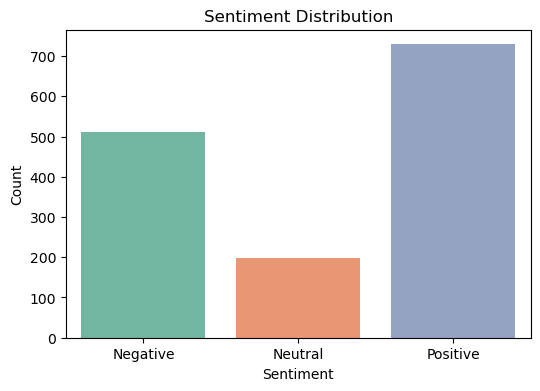

In [19]:
#1. Sentiment Distribution (Bar Plot)

plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", hue="sentiment", data=df, palette="Set2", legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


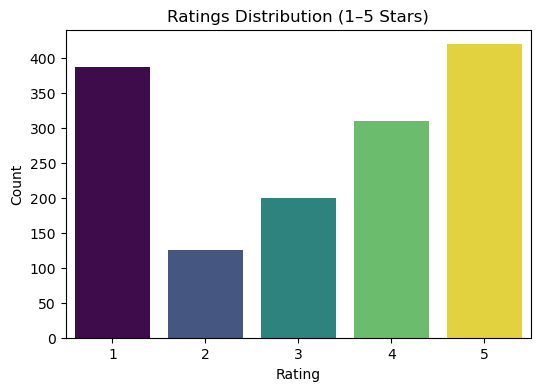

In [20]:
#2. Ratings Distribution
#Useful before mapping to sentiment.

plt.figure(figsize=(6,4))
sns.countplot(x="rating", hue="rating", data=df, palette="viridis", legend=False)
plt.title("Ratings Distribution (1–5 Stars)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

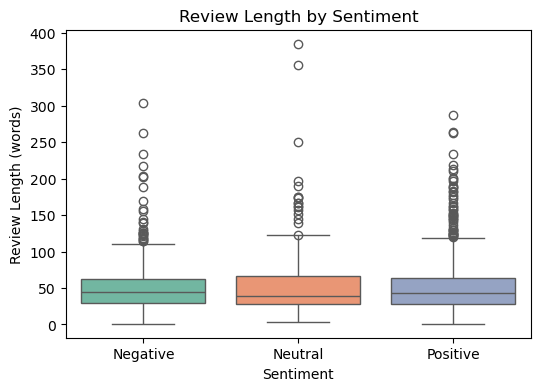

In [21]:
#3. Review Length by Sentiment (Boxplot)
#Shows if Positive reviews are longer than Negative ones.

plt.figure(figsize=(6,4))
sns.boxplot(x="sentiment", y="review_length", hue="sentiment",
            data=df, palette="Set2", legend=False)
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (words)")
plt.show()

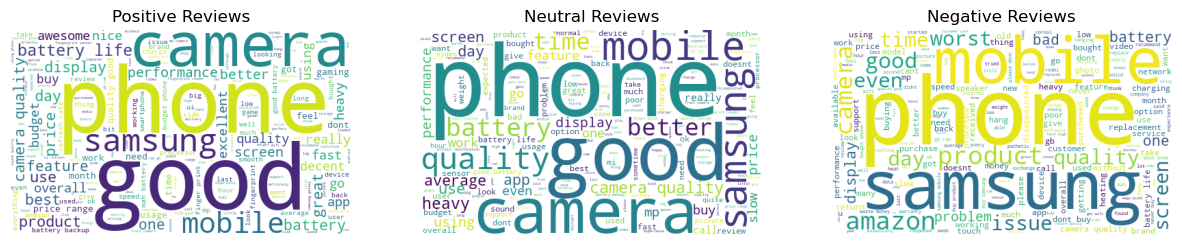

In [22]:
#4. Word Clouds (Most Frequent Words)
#Visualizes key words for each sentiment.

plt.figure(figsize=(15,5))

# Positive
plt.subplot(1,3,1)
plt.imshow(WordCloud(width=500, height=300, background_color="white").generate(
    " ".join(df[df["sentiment"]=="Positive"]["clean_body"])
))
plt.axis("off")
plt.title("Positive Reviews")

# Neutral
plt.subplot(1,3,2)
plt.imshow(WordCloud(width=500, height=300, background_color="white").generate(
    " ".join(df[df["sentiment"]=="Neutral"]["clean_body"])
))
plt.axis("off")
plt.title("Neutral Reviews")

# Negative
plt.subplot(1,3,3)
plt.imshow(WordCloud(width=500, height=300, background_color="white").generate(
    " ".join(df[df["sentiment"]=="Negative"]["clean_body"])
))
plt.axis("off")
plt.title("Negative Reviews")

plt.show()


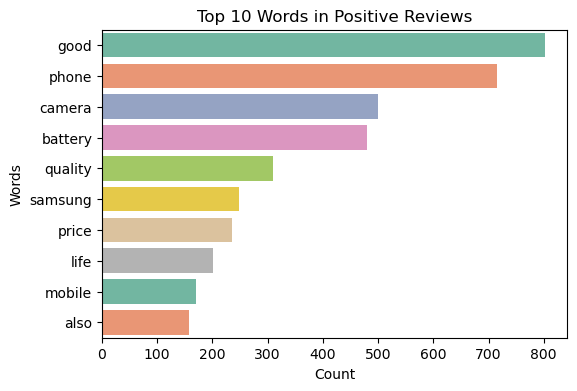

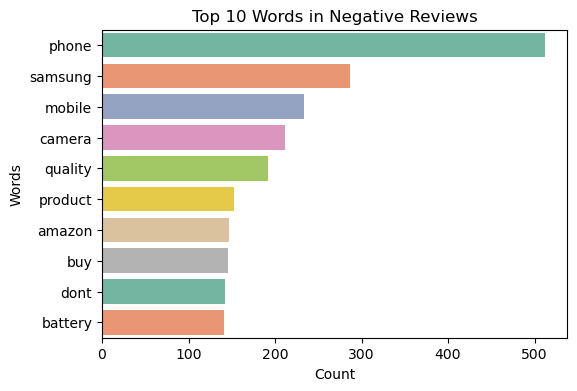

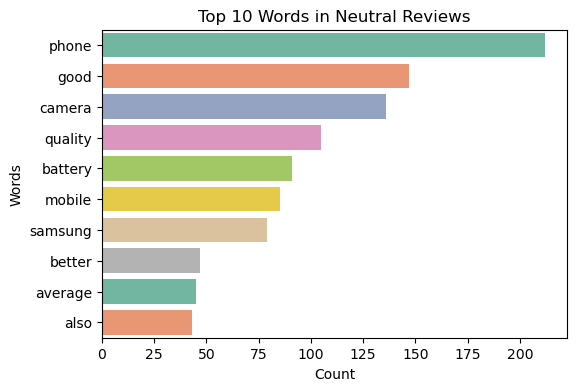

In [23]:
#5. Most Frequent Words (Bar Chart)
#Instead of just a word cloud, show the top 10 words.

from collections import Counter

def plot_top_words(sentiment, n=10):
    words = " ".join(df[df["sentiment"]==sentiment]["clean_body"]).split()
    common_words = Counter(words).most_common(n)
    words, counts = zip(*common_words)

    plt.figure(figsize=(6,4))
    #sns.barplot(x=list(counts), y=list(words), palette="Set2")
    sns.barplot(x=list(counts), y=list(words), hue=list(words), palette="Set2", legend=False)

    plt.title(f"Top {n} Words in {sentiment} Reviews")
    plt.xlabel("Count")
    plt.ylabel("Words")
    plt.show()

plot_top_words("Positive")
plot_top_words("Negative")
plot_top_words("Neutral")


In [24]:
#EDA Summary
#Dataset has 1440 reviews with ratings mapped to Positive, Neutral, Negative.
#Positive reviews dominate, while Neutral are least common.
#Average review length is about 53 words.
#Positive reviews are generally longer and more descriptive than Negative ones.
#Frequent word analysis shows:
#Positive → good, excellent, battery, performance
#Negative → bad, waste, heating, poor
#Neutral → mixed functional terms.

## Vectorization and Lemmatizaton




In [25]:
#Text Preprocessing: Lemmatization + Vectorization

In [26]:
#Lemmatization & Tokenization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def tokenize_lemmatize(text):
    tokens = word_tokenize(str(text))                  # tokenize
    tokens = [w.lower() for w in tokens if w.isalpha()]  # keep only words
    lemmas = [lemmatizer.lemmatize(w) for w in tokens]   # lemmatize
    return lemmas

# Apply on cleaned text
df["tokens"] = df["clean_body"].apply(tokenize_lemmatize)

# If you also want a string version
df["lemmatized_text"] = df["tokens"].apply(lambda x: " ".join(x))

# Preview
df[["body", "clean_body", "tokens", "lemmatized_text"]].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DIPIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DIPIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DIPIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DIPIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,body,clean_body,tokens,lemmatized_text
0,Very disappointed with the overall performance...,disappointed overall performance samsung,"[disappointed, overall, performance, samsung]",disappointed overall performance samsung
1,Camera quality is low,camera quality low,"[camera, quality, low]",camera quality low
2,"Got the mobile on the launch date,Battery must...",got mobile launch datebattery must appreciated...,"[got, mobile, launch, datebattery, must, appre...",got mobile launch datebattery must appreciated...
3,1. It doesn't work with 5.0GHz WiFi frequency....,doesnt work ghz wifi frequency ghz old school ...,"[doesnt, work, ghz, wifi, frequency, ghz, old,...",doesnt work ghz wifi frequency ghz old school ...
4,"Not worth buying....faulty software, poor disp...",worth buyingfaulty software poor display quali...,"[worth, buyingfaulty, software, poor, display,...",worth buyingfaulty software poor display quali...


In [27]:
#2. Vectorization


In [28]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(df["lemmatized_text"])

print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (1440, 5000)


In [29]:
#3. Preparing Target Labels
y = df["sentiment"]  # target variable

print("Features shape (X):", X_tfidf.shape)
print("Labels shape (y):", y.shape)


Features shape (X): (1440, 5000)
Labels shape (y): (1440,)


# MODEL BUILDING

In [30]:
#Sentiment Analysis:

In [31]:
#Imports:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

In [32]:
# Features (X) and labels (y):
X = X_tfidf   # or X_counts (from vectorization step)
y = df['sentiment']

In [33]:
# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
#Stratified K-Fold Cross-Validation on Training Set
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# 1.Naive Bayes:


In [35]:
#1. Naive Bayes (Baseline Model):
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
trained_models = {}
trained_models["Naive Bayes"] = nb_model

In [36]:

y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Performance:")
#print(classification_report(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, zero_division=0))



Naive Bayes Performance:
              precision    recall  f1-score   support

    Negative       0.83      0.68      0.75       102
     Neutral       0.00      0.00      0.00        40
    Positive       0.69      0.97      0.81       146

    accuracy                           0.73       288
   macro avg       0.51      0.55      0.52       288
weighted avg       0.65      0.73      0.67       288



## 2.Logistic Regression

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # 'l1' requires solver='liblinear'
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)

best_log_reg = grid_lr.best_estimator_
print("Best Logistic Regression parameters:", grid_lr.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Logistic Regression parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}


In [38]:

y_pred_lr = best_log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Performance:
              precision    recall  f1-score   support

    Negative       0.75      0.80      0.77       102
     Neutral       0.28      0.20      0.23        40
    Positive       0.84      0.86      0.85       146

    accuracy                           0.75       288
   macro avg       0.62      0.62      0.62       288
weighted avg       0.73      0.75      0.74       288



In [39]:
trained_models["Logistic reg"] = best_log_reg

# 3.SVM

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVC model
svc_model = SVC(random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],                # Regularization
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3],                  # Only used for 'poly'
    'gamma': ['scale', 'auto'],        # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'class_weight': [None, 'balanced']
}

# Grid search
grid_svc = GridSearchCV(svc_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_svc.fit(X_train, y_train)

# Best model
best_svc = grid_svc.best_estimator_
print("Best hyperparameters:", grid_svc.best_params_)

# Store in trained_models
trained_models["SVC"] = best_svc

# Evaluate
pred_svm = best_svc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm, zero_division=0))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best hyperparameters: {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

    Negative       0.75      0.78      0.77       102
     Neutral       0.34      0.30      0.32        40
    Positive       0.84      0.84      0.84       146

    accuracy                           0.75       288
   macro avg       0.64      0.64      0.64       288
weighted avg       0.74      0.75      0.74       288



## 4: Random Forest

In [41]:
#4: Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
trained_models["Random forest"] = rf_clf

In [42]:
y_pred_rf = rf_clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already trained your Random Forest and have predictions
# y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Random Forest Accuracy: 0.7361111111111112

Classification Report:

              precision    recall  f1-score   support

    Negative       0.73      0.79      0.76       102
     Neutral       0.00      0.00      0.00        40
    Positive       0.74      0.90      0.81       146

    accuracy                           0.74       288
   macro avg       0.49      0.56      0.52       288
weighted avg       0.63      0.74      0.68       288



# Confusoin Matrix for All models

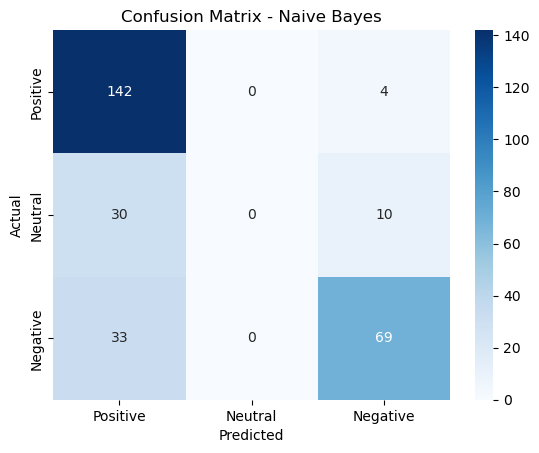

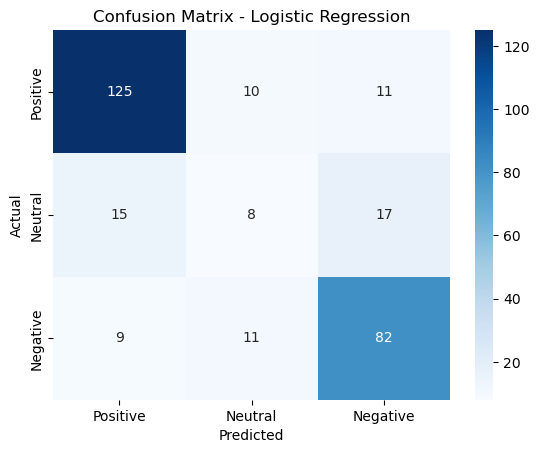

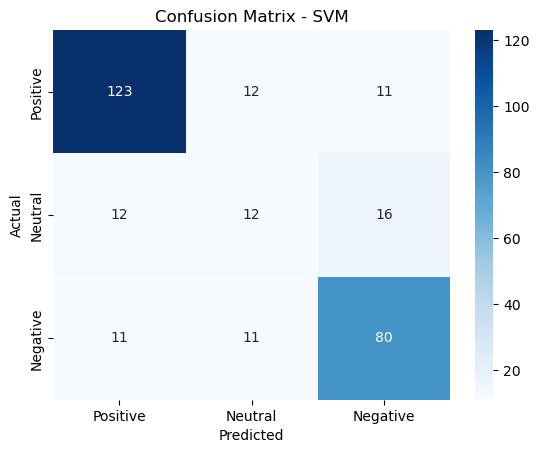

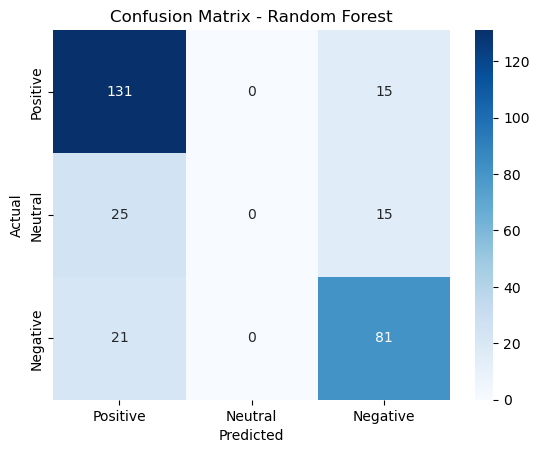

In [44]:

#Confusion Matrix Visualization:

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=["Positive", "Neutral", "Negative"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Positive", "Neutral", "Negative"],
                yticklabels=["Positive", "Neutral", "Negative"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

plot_conf_matrix(y_test, y_pred_nb, "Naive Bayes")
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, pred_svm, "SVM")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")



## Model Comparison

In [45]:
#Model Comparison:
from sklearn.metrics import accuracy_score, f1_score

results = {
    "Naive Bayes": [accuracy_score(y_test, y_pred_nb), f1_score(y_test, y_pred_nb, average="weighted")],
    "Logistic Regression": [accuracy_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr, average="weighted")],
    "SVM": [accuracy_score(y_test, pred_svm), f1_score(y_test, pred_svm, average="weighted")],
    "Random Forest": [accuracy_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf, average="weighted")],

    }

results_df = pd.DataFrame(results, index=["Accuracy", "F1 Score"])
print(results_df)


          Naive Bayes  Logistic Regression       SVM  Random Forest
Accuracy     0.732639             0.746528  0.746528       0.736111
F1 Score     0.674366             0.735798  0.742660       0.680572


# Evaluation

In [47]:
#Evaluation:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reports
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb, zero_division=0))
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr, zero_division=0))
print("SVM:\n", classification_report(y_test, pred_svm, zero_division=0))
print("Random Forest:\n", classification_report(y_test, y_pred_rf, zero_division=0))



Naive Bayes:
               precision    recall  f1-score   support

    Negative       0.83      0.68      0.75       102
     Neutral       0.00      0.00      0.00        40
    Positive       0.69      0.97      0.81       146

    accuracy                           0.73       288
   macro avg       0.51      0.55      0.52       288
weighted avg       0.65      0.73      0.67       288

Logistic Regression:
               precision    recall  f1-score   support

    Negative       0.75      0.80      0.77       102
     Neutral       0.28      0.20      0.23        40
    Positive       0.84      0.86      0.85       146

    accuracy                           0.75       288
   macro avg       0.62      0.62      0.62       288
weighted avg       0.73      0.75      0.74       288

SVM:
               precision    recall  f1-score   support

    Negative       0.75      0.78      0.77       102
     Neutral       0.34      0.30      0.32        40
    Positive       0.84      0.84

In [48]:
df

,title,rating,body,sentiment,clean_body,review_length,tokens,lemmatized_text
0,Horrible product,1,Very disappointed with the overall performance...,Negative,disappointed overall performance samsung,8,"[disappointed, overall, performance, samsung]",disappointed overall performance samsung
1,Camera quality is not like 48 megapixel,3,Camera quality is low,Neutral,camera quality low,4,"[camera, quality, low]",camera quality low
2,Overall,4,"Got the mobile on the launch date,Battery must...",Positive,got mobile launch datebattery must appreciated...,66,"[got, mobile, launch, datebattery, must, appre...",got mobile launch datebattery must appreciated...
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,Negative,doesnt work ghz wifi frequency ghz old school ...,67,"[doesnt, work, ghz, wifi, frequency, ghz, old,...",doesnt work ghz wifi frequency ghz old school ...
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",Negative,worth buyingfaulty software poor display quali...,29,"[worth, buyingfaulty, software, poor, display,...",worth buyingfaulty software poor display quali...
...,...,...,...,...,...,...,...,...
1435,Excellent mobile,5,Excellent mobile,Positive,excellent mobile,2,"[excellent, mobile]",excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve...",Negative,mobile performance poor never buy one product ...,31,"[mobile, performance, poor, never, buy, one, p...",mobile performance poor never buy one product ...
1437,Good value for money,5,Battery life is good but camera clarity could ...,Positive,battery life good camera clarity could little ...,17,"[battery, life, good, camera, clarity, could, ...",battery life good camera clarity could little ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied.....",Negative,bad product highly dissatisfied specifically c...,35,"[bad, product, highly, dissatisfied, specifica...",bad product highly dissatisfied specifically c...


In [49]:
print(df.columns)


Index(['title', 'rating', 'body', 'sentiment', 'clean_body', 'review_length',
       'tokens', 'lemmatized_text'],
      dtype='object')


# Model Deployment








In [50]:

import pickle

# Save TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("logreg_model.pkl", "wb") as f:
    pickle.dump(best_log_reg, f)   # <-- note the underscore


In [ ]:
import streamlit as st
import pickle
import re
import matplotlib.pyplot as plt

# ----------------------------
# Load TF-IDF vectorizer and Logistic Regression model
# ----------------------------
with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("logreg_model.pkl", "rb") as f:
    logreg_model = pickle.load(f)

# ----------------------------
# Text cleaning function
# ----------------------------
def clean_text(s):
    s = str(s).lower().strip()
    s = re.sub(r'\s+', ' ', s)              # remove extra spaces
    s = re.sub(r'[^a-z0-9\s]', '', s)       # keep letters & numbers
    return s

# ----------------------------
# Store prediction history in session_state
# ----------------------------
if "history" not in st.session_state:
    st.session_state.history = []

# ----------------------------
# Streamlit UI
# ----------------------------
st.set_page_config(page_title="Sentiment Analysis App", layout="centered")
st.title("📊 Sentiment Analysis App (Logistic Regression + TF-IDF)")
st.write("Enter a review or sentence below to predict its sentiment.")

user_input = st.text_area("✍️ Enter your text:")

if st.button("Predict"):
    if user_input.strip():
        # Preprocess input
        text = clean_text(user_input)
        X_input = vectorizer.transform([text])

        # Predict sentiment
        prediction = logreg_model.predict(X_input)[0]
        proba = logreg_model.predict_proba(X_input)[0]  # probability scores

        # ----------------------------
        # Display prediction
        # ----------------------------
        st.subheader("🔎 Prediction:")
        if prediction.lower() == "positive":
            st.success("🙂 Positive Sentiment")
        elif prediction.lower() == "negative":
            st.error("😠 Negative Sentiment")
        else:
            st.info("😐 Neutral Sentiment")

        # ----------------------------
        # Save history
        # ----------------------------
        st.session_state.history.append((user_input, prediction))

        # ----------------------------
        # Show probabilities as bar chart
        # ----------------------------
        st.subheader("📊 Prediction Confidence")
        color_map = {"positive": "green", "negative": "red", "neutral": "gray"}
        colors = [color_map.get(cls.lower(), "blue") for cls in logreg_model.classes_]

        fig, ax = plt.subplots()
        ax.bar(logreg_model.classes_, proba, color=colors)
        ax.set_ylabel("Probability")
        ax.set_ylim(0, 1)
        ax.set_title("Sentiment Confidence")
        st.pyplot(fig)

        # ----------------------------
        # Show text statistics
        # ----------------------------
        st.subheader("📌 Text Statistics")
        st.write("Word count:", len(text.split()))
        st.write("Character count:", len(text))

    else:
        st.warning("⚠️ Please enter some text.")

# ----------------------------
# Show prediction history
# ----------------------------
if st.session_state.history:
    st.subheader("📝 Prediction History")
    for i, (txt, pred) in enumerate(st.session_state.history, 1):
        st.write(f"{i}. **{txt}** → {pred}")
